# Keras image classification development

#### This is a binary image classification test on corn with leaf blight and healthy corn; 
#### We are training using sample images from Kaggle and drone images from Cornell University 
#### ---------------------------------------------------------------------------------------------------------------------------

# To Do for model development:

## Broad/long-term goals

- [ ] Find more crop data to create a more diverse training set
- [ ] Add/reshape model layers
- [ ] Figure out classifications beyond binary
- [ ] Add and tweak decay, momentum, etc. hyperparameters
- [ ] Further research and evaluate optimizer types
- [ ] Try to build our model atop a pre-made model

## Immediate/short-term goals

- [ ] Add all image files to one directory
- [ ] Move imagereader files and paths to current folder
- [ ] Upload all current code to GitHub
- [ ] Finish cleaning this code for ease of running, accessibility, and configuring training settings
- [ ] Manipulate saved model weights rather than retraining each time

In [1]:
#  basic modules 
import random, datetime
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#  data and display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import h5py

#  our custom modules
import imagereader as ir

#  file utilities
import os
import cv2
import shutil
import gc # Garbage collector for cleaning deleted data from memory

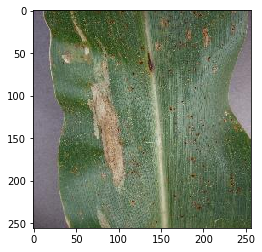

In [2]:
train_healthy_dir = './input/dataset/train_corn/healthy/'
train_spot_dir = './input/dataset/train_corn/spot/'
train_rust_dir = './input/dataset/train_corn/rust/'
train_blight_dir = './input/dataset/train_corn/blight/'

test_healthy_dir = './input/dataset/test_corn/healthy/'
test_spot_dir = './input/dataset/test_corn/spot/'
test_rust_dir = './input/dataset/test_corn/rust/'
test_blight_dir = './input/dataset/test_corn/blight/'

train_healthy = [train_healthy_dir+'{}'.format(i) for i in os.listdir(train_healthy_dir)]
train_spot = [train_spot_dir+'{}'.format(i) for i in os.listdir(train_spot_dir)]
train_rust = [train_rust_dir+'{}'.format(i) for i in os.listdir(train_rust_dir)]
train_blight = [train_blight_dir+'{}'.format(i) for i in os.listdir(train_blight_dir)]

test_healthy = [test_healthy_dir+'{}'.format(i) for i in os.listdir(test_healthy_dir)]
test_spot = [test_spot_dir+'{}'.format(i) for i in os.listdir(test_spot_dir)]
test_rust = [test_rust_dir+'{}'.format(i) for i in os.listdir(test_rust_dir)]
test_blight = [test_blight_dir+'{}'.format(i) for i in os.listdir(test_blight_dir)]

#  Create sets from the sample images
train_imgs = train_blight + train_healthy
random.shuffle(train_imgs)

test_imgs = test_blight + test_healthy 
random.shuffle(test_imgs)

#  show image to test that sample images are loaded
plt.imshow(mpimg.imread(train_imgs[0]))

In [3]:
def read_and_process_image(list_of_images, image_location, nrows=256, ncolumns=256):
    x = []
    y = []
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
        
        if image in image_location:
            y.append(1)
        else:
            y.append(0)
            
    return x, y

#  Processing the training sample images
x, y = read_and_process_image(train_imgs, train_healthy)
#print("Shape of train images is: {}\nShape of Labels is {}".format(x.shape, y.shape))

#  Processing the test sample images
x_test, y_test = read_and_process_image(test_imgs, test_healthy)
#print("Shape of train images is: {}\nShape of Labels is {}".format(x_test.shape, y_test.shape))

gc.collect()

26

0 is a 0
1 is a 1
2 is a 1
3 is a 1
4 is a 1


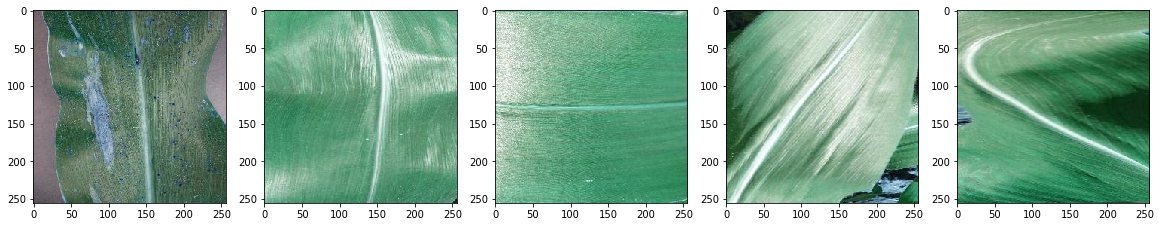

In [4]:
plt.figure(figsize=(20, 10))
columns = 5
for i in range(columns):
    print(i,"is a", y[i])
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(x[i]) 

Text(0.5, 1.0, 'Labels for Healthy and Blight')

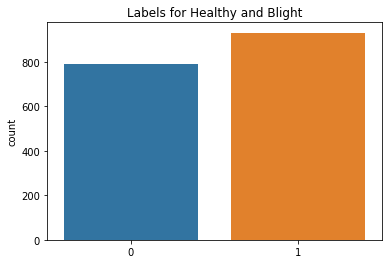

In [5]:
import seaborn as sns

sns.countplot(y)
plt.title('Labels for Healthy and Blight')

In [6]:
#  setting up keras utilities and model layers
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess= tf.Session(config=config)

# TODO: add/reshape model layers
with tf.device("/gpu:0"):
    model = models.Sequential()  #  model first created
    model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3))) #  image size taken by model
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))  #Dropout for regularization
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes
    
model.summary()

Using TensorFlow backend.
W0726 12:49:48.321645 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 12:49:48.323284 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 12:49:48.325752 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 12:49:48.337484 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0726 12:49:48.375769 1400372

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
__________

In [9]:
#  Establish setting for training data creation and model training
augment_traindata = True  #  determine level of augmentation of data; speed/accuracy tradeoff for True/False respectively
read_method = "from_file" #  Direct read is highly not recommended due to time and memory overhead, write to file with ir and read from file
training_set_content = "sample"  #  specify which set is trained over

In [10]:
#  Create the image transformation generators used in the model training
if augment_traindata == False:
    train_datagen = ImageDataGenerator(rescale=1./255)  
elif augment_traindata == True:
    train_datagen = ImageDataGenerator(rescale=1./255,   #  Scale the brightness
                                        rotation_range=40,
                                        #width_shift_range=0.2,
                                        #height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode="reflect")
else:
    print("No augmentation setting specified")

val_datagen = ImageDataGenerator(rescale=1./255)  #  Only ever rescale the validation data for true measure of model accuracy

In [11]:
if read_method == "from_file":
    f = h5py.File('./cropdata-U8.hdf5', 'r+')  # !METHOD 1! - reading our corn image data from the static file
    pictures = list(f.get('pics')[()])         #  READTIME is trivial if there is free memory
    f.close()                              
elif read_method == "direct":
    pictures = ir.read_all_images(x=256, y=256)  #  !METHOD 2! - reading our corn image data directly from the image folders. READTIME: exactly 4mins
else:
    print("No images read")
    
gc.collect()

11177

In [12]:
blightvals = ir.get_all_Bools()  #  <-- NOTE: This always reads the bools directly; 
                                 #  if reading from the static image file, make sure that the file reflects current data before running
#  formatting our image data
x_train, x_val, y_train, y_val = train_test_split(pictures, blightvals, test_size=0.2) 

#  formatting the sample data
x_sample, x_val1, y_sample, y_val1 = train_test_split(x, y, test_size=0.2)     

In [13]:
#  create set to be trained over
def merge_and_shuffle(set1, set2):  #  combines and shuffles a list and nparray (respectively) and  returns a combined array
    modelset = set1 + set2
    random.shuffle(modelset)
    return modelset

if training_set_content == "ours":  #  training and evaluating over our data
    x_training = x_train
    x_valid = x_val
    y_training = y_train
    y_valid = y_val
    feat, lab = pictures, blightvals
elif training_set_content == "sample":  #  training and evaluating over the sample data
    x_training = x_sample
    x_valid = x_val1
    y_training = y_sample
    y_valid = y_val1
    feat, lab = x_test, y_test
elif training_set_content == "mixed":
    x_training = merge_and_shuffle(x_train, x_sample)  #  mixing the two data sets 
    x_valid = merge_and_shuffle(x_val, x_val1)  #  (has less favorable performance due to disparity in images)
    y_training = merge_and_shuffle(y_train, y_sample)
    y_valid = merge_and_shuffle(y_val, y_val1)
    feat, lab = pictures + x_test, blightvals + y_test
else:
    print("No data loaded")

In [14]:
ntrain, nval = len(x_training), len(y_training)
batch_size = 32  #  set batchsize
print(ntrain + len(x_valid),"\n", ntrain,"\n", len(x_valid))

#Create the image generators
train_generator = train_datagen.flow(np.array(x_training), np.array(y_training), batch_size=batch_size)
val_generator = val_datagen.flow(np.array(x_valid), np.array(y_valid), batch_size=batch_size)

1718 
 1374 
 344


In [15]:
#  Place to tweak classification type, Learn rate, and Optimizer type
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

W0726 12:50:19.416749 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 12:50:19.420737 140037221943104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0726 12:50:19.424454 140037221943104 deprecation.py:323] From /home/etv/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#  The training part; adjust hyperparameters (in two cells above and current cell) to tweak model performance
history = model.fit_generator(train_generator,
                              steps_per_epoch = ntrain // batch_size,
                              epochs=4,
                              validation_data = val_generator,
                              validation_steps = nval // batch_size)

Epoch 1/4
42/42 [==============================] - 13s 305ms/step - loss: 0.4721 - acc: 0.7545 - val_loss: 0.1650 - val_acc: 0.9333
Epoch 2/4
42/42 [==============================] - 11s 255ms/step - loss: 0.0729 - acc: 0.9761 - val_loss: 0.0845 - val_acc: 0.9825
Epoch 3/4
42/42 [==============================] - 11s 257ms/step - loss: 0.0199 - acc: 0.9948 - val_loss: 0.0699 - val_acc: 0.9893
Epoch 4/4
42/42 [==============================] - 11s 255ms/step - loss: 0.0117 - acc: 0.9970 - val_loss: 0.0443 - val_acc: 0.9901


In [17]:
#  Check if files exist and rewrite if they do
if os.path.isfile('model_keras.h5') == True:
    os.remove('model_keras.h5')
os.mknod('model_keras.h5')

if os.path.isfile('model_weights.h5') == True:
    os.remove('model_weights.h5')
os.mknod('model_weights.h5')

#  Save the model
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

#  from keras.models import load_model & load_model(<modelname>)  - (loads pretrained model)

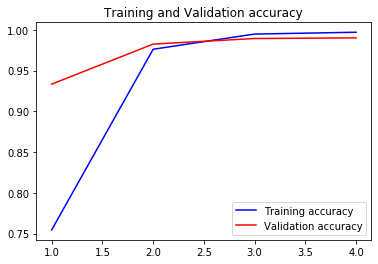

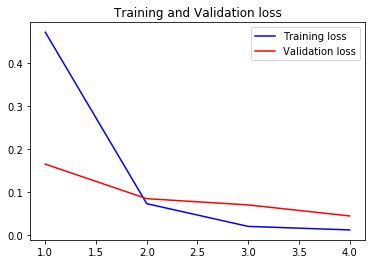

In [18]:
#  Plotting the train and val progress
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [19]:
#  Personal Code for testing for false evaluations over test data; feat and lab defined when selecting model input data
def document_mistakes(features, labels):
    print("Predicting...", end="\r")
    results = model.predict(np.array(features))
    print("Done Predicting", end="\r")
    predictions = []
    for val in results:
        predictions.append(int(round(val[0])))

    fps, names, labelz = [], [], {1:"Healthy", 0:"Sick"}
    for i in range(len(labels)-1):
        if predictions[i] != labels[i]:
            fps.append(i)
            names.append(labelz[predictions[i]])

    #  code for displaying false predictions
    print("False Predictions in %d%% of the data, exporting %d fakes..." % (100*len(fps)//len(labels), len(fps)))
    
    #  cleanout files after each pass
    if os.path.exists("./fakes") == True:
        shutil.rmtree("./fakes")
    os.mkdir("fakes")
    
    #  export false evaluations to fakes folder
    time = lambda a: datetime.datetime.now().strftime(a)
    for i, val in enumerate(fps):
        plt.imsave("./fakes/fakeid{}-flagged:{}@{}.png".format(val, names[i], time("%X")), features[val])
    
document_mistakes(feat, lab)

False Predictions in 2% of the data, exporting 11 fakes...


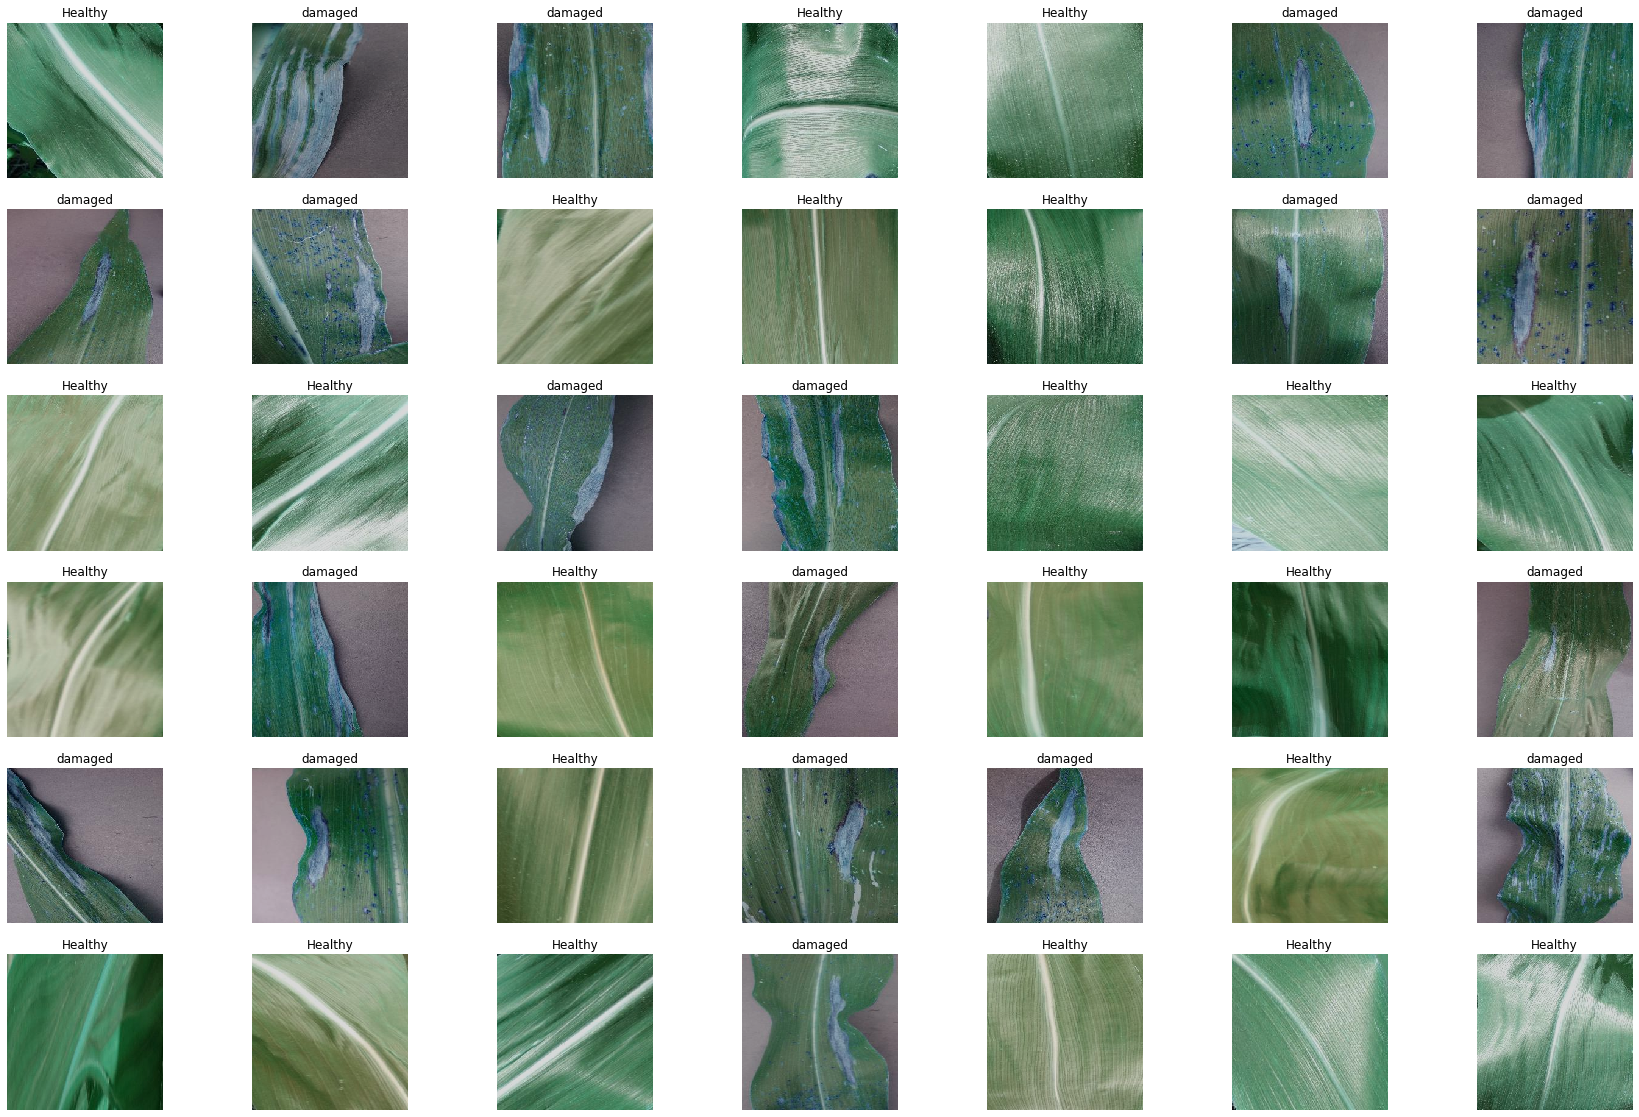

In [21]:
#  Test and display model prediction over generated images based on the training set

#  Configure augmentation settings for the evaluation
test_datagen = ImageDataGenerator(rescale=1./300,
                                  rotation_range=0,
                                  width_shift_range=0.0,
                                  height_shift_range=0.0,
                                  shear_range=0.0,
                                  zoom_range=0.0,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode="constant",
                                  cval=12)

def show_predictions(columns, total_images):  #  Displays the specified amount foaugmented data and predictions in given number of rows
    all_images = x_training#training image reference      
    all_images = all_images[:total_images]
    text_labels, i = [], 0
    plt.figure(figsize=(30,20))
    for batch in test_datagen.flow(np.array(all_images), batch_size=1):
        pred = model.predict(batch)
        if pred > 0.5:
            text_labels.append('Healthy')
        else:
            text_labels.append('damaged')
        plt.subplot(((total_images-1)//columns)+1, columns, i+1)
        plt.title(text_labels[i])
        plt.axis("off")
        imgplot = plt.imshow(batch[0])
        i += 1
        if i % total_images == 0:
            break
            
show_predictions(5, 30)

# Conclusion

This first ever working run with Keras is promising and is reminiscent of what other first run projects have produced.
Some of the spikes in loss of accuracy could be attributed to bad data. Further investigation and tuning needed.

In [ ]:
gc.collect()